In [1]:
import logging
logging.basicConfig(level=logging.INFO)
import matplotlib.pyplot as plt
import atlite
import pandas as pd
from pytz import common_timezones, all_timezones

outdir = 'output/'

## MERRA2

In [2]:
DS = atlite.Dataset(	module="merra2",
						years=slice(2015, 2015),
						months=slice(1,12))
DS.trim_variables(downloadedfiles=True)

INFO:atlite.dataset:Directory /Users/michd/Research/GEODATA/data/merra2_GDsub found, checking for completeness.
INFO:atlite.dataset:Directory complete.


In [2]:
## Load cutout
# if already created, should just return reference to that folder
cutout = atlite.Cutout(name="merra2_GDsub",
                       module="merra2",
                       xs = slice(108.125, 118.125),
                       ys = slice(28.0, 43.0),
                       years=[2015] )

INFO:atlite.cutout:No months specified, defaulting to 1-12
INFO:atlite.cutout:All cutout (merra2_GDsub, /Users/michd/Research/GEODATA/data/cutouts) files available.
INFO:atlite.preparation:[4, 1, 1, 10]
INFO:atlite.cutout:Cutout subset prepared: <Cutout merra2_GDsub x=108.12-118.12 y=28.00-43.00 time=2015/1-2015/12 prepared>


In [5]:
## Load cutout
# if already created, should just return reference to that folder
cutout = atlite.Cutout(name="merra2-europe-sub2-2011-01",
                       module="merra2",
                       xs=slice(30, 41.56244222),
                        ys=slice(33.56459975, 35),
                       years=slice(2011, 2011),
                       months=slice(1,1,1) )

KeyboardInterrupt: 

## Convert wind

In [46]:
## Wind profiles
# call: wind(cutout, turbine, smooth=False, **params)
#	.. cutout.convert_and_aggregate(convert_func=convert_wind, turbine=turbine,**params)
# Returns xr.DataArray
ds = atlite.convert.wind(cutout, turbine='Suzlon_S82_1.5_MW', smooth=True, var_height='lml')

INFO:atlite.convert:Keeping time dimension.


In [4]:
## Wind profiles
# call: wind(cutout, turbine, smooth=False, **params)
#	.. cutout.convert_and_aggregate(convert_func=convert_wind, turbine=turbine,**params)
# Returns xr.DataArray
ds = atlite.convert.windspd(cutout, turbine='Suzlon_S82_1.5_MW', var_height='lml')

In [3]:
ds2 = atlite.convert.windspd(cutout, turbine='Suzlon_S82_1.5_MW', var_height='lml', extrap_fn = atlite.wind.log_law_flux_linearexpconst)

In [2]:
## Load cutout
# if already created, should just return reference to that folder
cutout = atlite.Cutout(name="europe-sub2-2011-01",
                       module="era5",
                       xs=slice(30, 41.56244222),
                       ys=slice(35, 33.56459975),
                       years=slice(2011, 2011),
                       months=slice(1,1,1) )

INFO:atlite.cutout:All cutout (europe-sub2-2011-01, /Users/michd/Research/GEODATA/data/cutouts) files available.
INFO:atlite.preparation:[4, 1, 1, 10]
INFO:atlite.cutout:Cutout subset prepared: <Cutout europe-sub2-2011-01 x=30.00-41.50 y=35.00-33.75 time=2011/1-2011/1 prepared>


## Saving and plotting

In [ ]:
# Pandas and save to csv
df = ds2.to_dataframe(name='var')
# df.to_csv(outdir + 'merra2_wind_test_sm.csv')
df.reset_index(level=df.index.names, inplace=True)

In [7]:
# Plot
df[df.time == '2010-01-01 00:30:00'].plot.scatter(x='lon', y='lat', c='var',s=50,  cmap='jet')
plt.show()

ValueError: scatter requires x column to be numeric

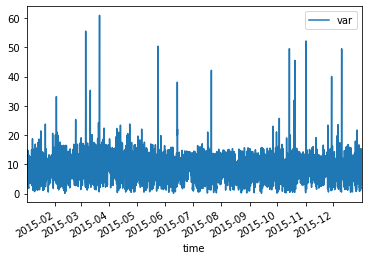

In [9]:
# df[(df.lat == 35) & (df.lon == 40)].plot(x='time', y='power')
df[(df.lat == 28.0) & (df.lon == 108.125)].plot(x='time', y='var')
plt.show()

In [5]:
# Pandas
df = ds.to_dataframe(name='var')
df = df[(df['lat'] == 28.0) & (df['lon'] == 108.125)]
df.reset_index(level=df.index.names, inplace=True)
df2 = ds2.to_dataframe(name='var2')
df2 = df2[(df2['lat'] == 28.0) & (df2['lon'] == 108.125)]
df2.reset_index(level=df2.index.names, inplace=True)
df = pd.merge(df,df2 )

In [6]:
# df['time'] = df['time'].dt.tz_localize('GMT')
df['timeCST'] =  df['time'].dt.tz_localize('GMT').dt.tz_convert('Asia/Shanghai')

In [32]:
march_2015 = '"2015-03-01" <= time < "2015-03-08"'
march_2015_CST = '"2015-02-28 16:00:00" <= time < "2015-03-07 16:00:00"'

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


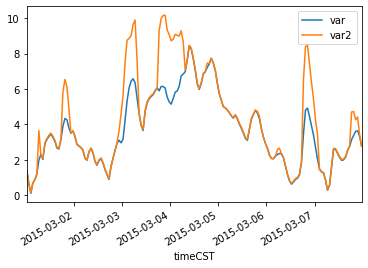

In [8]:
df.query(march_2015_CST).plot(x='timeCST', y=['var','var2'])
plt.show()

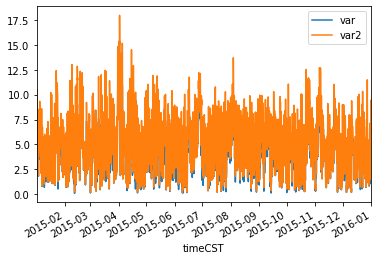

In [9]:
df.plot(x='timeCST', y=['var','var2'])
plt.show()

In [10]:
dfwind = df

## Playing with nc files

In [22]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# x = xr.open_dataset('/Users/michd/Documents/GEODATA/data/merra2/2011/01/MERRA2_400.tavg1_2d_flx_Nx.20110118.nc4')
# x = xr.open_dataset('/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/01/MERRA2_300.tavg1_2d_flx_Nx.20100101.nc4')
x = xr.open_dataset('/Users/michd/Research/GEODATA/data/cutouts/merra2_GDsub/201503.nc')
x.data_vars

Data variables:
    tlml       (time, y, x) float32 ...
    tstar      (time, y, x) float32 ...
    hflux      (time, y, x) float32 ...
    roughness  (time, y, x) float32 ...
    disph      (time, y, x) float32 ...
    vlml       (time, y, x) float32 ...
    hlml       (time, y, x) float32 ...
    eflux      (time, y, x) float32 ...
    pblh       (time, y, x) float32 ...
    ustar      (time, y, x) float32 ...
    rhoa       (time, y, x) float32 ...
    ulml       (time, y, x) float32 ...
    wndlml     (time, y, x) float32 ...

In [24]:
# Obukhov length (old)
ds = x
vonk = 0.4  # Von Karman constant
grav = 9.81  # gravitational acceleration in kg m s-2
CPD = 1004 # specific heat of dry air at constant pressure J K-1 kg-1
# backwards!: ds['L'] =  - (ds['tlml'] / (vonk * grav)) * ds['ustar'] ** 3  / (ds['hflux'] / (CPD * ds['rhoa']))
ds['L'] =   - (ds['tlml'] / (vonk * grav)) * ds['ustar'] ** 3  / (ds['hflux'] / (CPD * ds['rhoa']))

In [25]:
# Obukhov length (updated)
ds = x
vonk = 0.4  # Von Karman constant
grav = 9.81  # gravitational acceleration in kg m s-2
CPD = 1004 # specific heat of dry air at constant pressure J K-1 kg-1
Le = 2.257e6 # latent heat of evaporation [J/kg] 
kp = 2/7    # Poisson constant
Rd = 287    #  Ideal gas constant [J/kg/K] --> P = rho*Rd*T
p0 = 1e5  # standard air pressure

ds['p'] = ds['rhoa'] * Rd * ds['tlml']
ds['vphflux'] = ds['hflux'] + 0.61 * CPD/Le * ds['tlml'] * (p0 / ds['p']) ** kp * ds['eflux']
ds['L_vph'] =  - (ds['tlml'] * ds['ustar'] ** 3 * CPD * ds['rhoa']) / ( vonk * grav * ds['vphflux'])

In [26]:
df = ds.to_dataframe()
df.reset_index(level=df.index.names, inplace=True)
grid_loc = ((df.lat == 28.0) & (df.lon == 108.125))

In [9]:
a = x['pblh']
b = x['hlml']

c = xr.merge([a,b])

c['z']=c['hlml']*0
c['z'].values[c['hlml'].values>60]=2

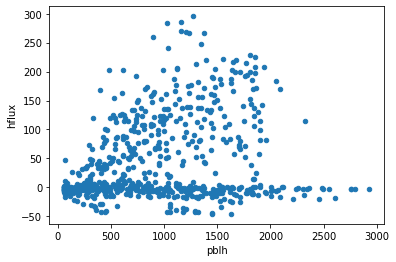

In [31]:
# Plot
df[grid_loc].plot.scatter(x='pblh', y='hflux')
plt.show()

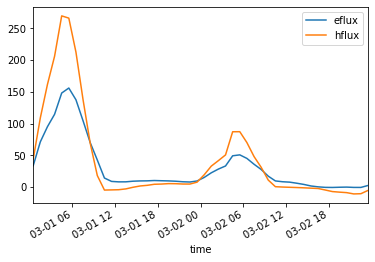

In [33]:
df[grid_loc].query('20150301 < time < 20150303').plot(x='time', y=['eflux','hflux'])
plt.show()

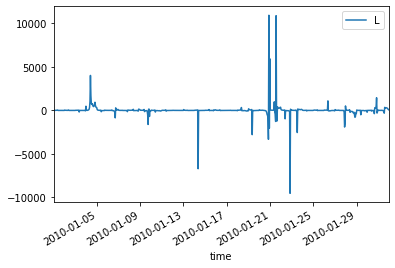

In [53]:
# Plot
f = df[(df.lat == 28.0) & (df.lon == 108.125)].plot(x='time', y='L')
f.get_figure().savefig(outdir + 'L_example.png')

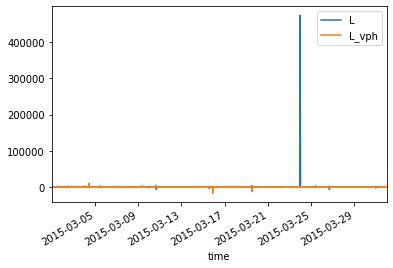

In [16]:
# Plot
f = df[grid_loc].plot(x='time', y=['L','L_vph'])
# f.get_figure().savefig(outdir + 'L_example.png')

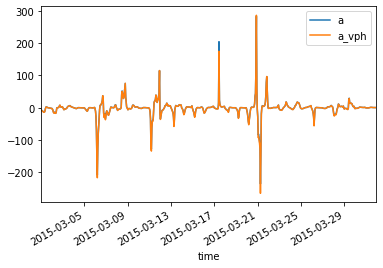

In [17]:
df['a'] = 80 / df['L']
df['a_vph'] = 80 / df['L_vph']
f = df[(df.lat == 28.0) & (df.lon == 108.125)].plot(x='time', y=['a','a_vph'])

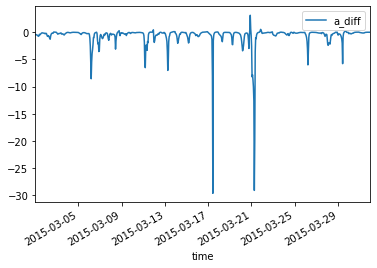

In [28]:
df['a'] = 80 / df['L']
df['a_vph'] = 80 / df['L_vph']
df['a_diff'] = df['a_vph']-df['a']
f = df[(df.lat == 28.0) & (df.lon == 108.125)].plot(x='time', y='a_diff')

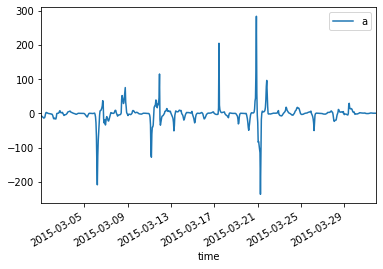

In [18]:
dfmerge = pd.merge(df,dfwind)
grid_loc = ((dfmerge.lat == 28.0) & (dfmerge.lon == 108.125))
f = dfmerge[grid_loc].plot(x='time', y='a')

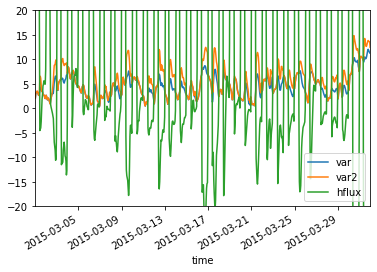

In [20]:
f = dfmerge[grid_loc].plot(x='time', y=['var','var2','hflux'], ylim=(-20,20))
f.get_figure().savefig(outdir + 'wsp_flux_linearexpconst_example.png')

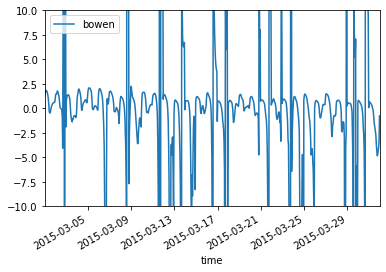

In [75]:
df['bowen'] = df['hflux'] / df['eflux']
f = df[grid_loc].plot(x='time', y='bowen',ylim=(-10,10))

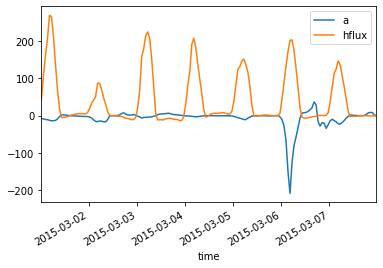

In [34]:
# f = df[grid_loc].query('a_vph>0').plot(x='time', y=['a','a_vph','hflux','eflux'])
f = df[grid_loc].query(march_2015).plot(x='time', y=['a','hflux'])
f.get_figure().savefig(outdir + 'a_example.png')

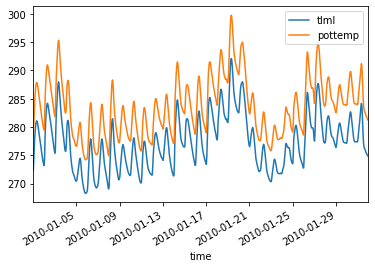

In [80]:
df['pottemp'] = df['tlml'] * (p0 / df['p']) ** kp
f=df[(df.lat == 28.0) & (df.lon == 108.125)].plot(x='time', y=['tlml','pottemp'])
# df[(df.lat == 28.0) & (df.lon == 108.125)].plot(x='time', y='p')

In [55]:
yds = yd.where((yd.y >= y0) & (yd.y <= yf), drop=True)

## Viewing meta data

In [9]:
ds = xr.open_dataset('/Users/michd/Research/GEODATA/data/cutouts/merra2_GDsub/meta.nc')
print(ds.dims)
ds.close()

Frozen(SortedKeysDict({'y': 31, 'time': 43824, 'x': 17, 'year': 5, 'month': 12}))


In [13]:
merra2_dir = '/Users/michd/Documents/GEODATA/data/merra2'
f = '201101/MERRA2_400.tavg1_2d_flx_Nx.20110101.nc4'
fn = merra2_dir + '/' + f
ds = xr.open_dataset(fn)

In [33]:
ds = xr.open_dataset(xf)

In [34]:
ds.dims

Frozen(SortedKeysDict({'time': 24, 'lat': 361, 'lon': 576}))

In [35]:
ds.coords

Coordinates:
  * time     (time) datetime64[ns] 2011-01-01T00:30:00 ... 2011-01-01T23:30:00
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4

In [36]:
y=list(ds.data_vars)
y

['rhoa',
 'tlml',
 'hlml',
 'pblh',
 'ulml',
 'disph',
 'tstar',
 'vlml',
 'ustar',
 'hflux',
 'z0m']

In [23]:
var_rename = dict((v, v.lower()) for v in list(ds.data_vars))
ds = ds.rename(var_rename)

In [25]:
vars = ['rhoa','ulml']
ds2 = ds[vars]
ds2.data_vars

Data variables:
    rhoa     (time, lat, lon) float32 ...
    ulml     (time, lat, lon) float32 ...

## Misc

In [18]:
from calendar import monthrange

In [33]:
years=slice(2011, 2012)
months=slice(1,2,1)

In [47]:
step = years.step if years.step else 1
yrs = range(years.start, years.stop+step, step)
step = months.step if months.step else 1
mos = range(months.start, months.stop+step, step)

In [49]:
tu = [(yr,mo,monthrange(yr,mo)[1]) for yr in yrs for mo in mos]

In [30]:
import glob, os

In [53]:
if not glob.glob('*.p'):
    print('no matching files')

no matching files


In [61]:
import os, six
weather_data_config = {
#	Single file contains all wind variables (≠ ncep)
# 	https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2/M2T1NXFLX.5.12.4/2015/01/MERRA2_400.tavg1_2d_flx_Nx.20150101.nc4
	'surface_flux': dict(tasks_func='tasks_monthly_merra2',
						  prepare_func='prepare_month_surface_flux',
						  template=os.path.join('merra2_dir', '{year}{month:0>2}/MERRA2_400.tavg1_2d_flx_Nx.*.nc4'),
						url = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2/M2T1NXFLX.5.12.4/{year}/{month:0>2}/MERRA2_400.tavg1_2d_flx_Nx.{year}{month:0>2}{day:0>2}.nc4',
						fn = '{year}{month:0>2}/MERRA2_400.tavg1_2d_flx_Nx.{year}{month:0>2}{day:0>2}.nc4')
#	TODO: solar radiation data
}

In [63]:
for k, v in six.iteritems(weather_data_config):
    print(k)
    [print(v2) for v2 in v]

surface_flux
tasks_func
prepare_func
template
url
fn


In [26]:
savedFiles = [('surface_flux', '/Users/michd/Documents/GEODATA/data/merra2/201101/MERRA2_400.tavg1_2d_flx_Nx.20110101.nc4')]

In [28]:
for d, f in savedFiles:
    print(d)
    print(f)

surface_flux
/Users/michd/Documents/GEODATA/data/merra2/201101/MERRA2_400.tavg1_2d_flx_Nx.20110101.nc4


In [32]:
xf = os.path.join(os.path.dirname(f),'trim/',os.path.split(f)[1])